
### Capstone Project

## Context
<center>
    <img src = ../images/diabetes-1.jpeg width="1500px" height="300px"/>
</center>

# Capstone Project

**Overview**: 

Goal is to analyse the Diabetes data and come up with model to predict the diabetes. Various tehcniques to be tested and choose the best that fits among - K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines 




### Performance Metrics


### Getting Started

The dataset used in thie analysis comes from the [Kaggel repository - Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv).  The data is collectd by CDC by doing telephone surveys know as "Behavioral Risk Factor Surveillance System". The survey  covers questions on health-related risk behaviors, chronic health conditions, and the use of preventative services from US residents. The dataset used for this anlysis is from 2015 survey by [CDC](https://www.cdc.gov/brfss/annual_data/annual_2015.html).

#### CRISP-DM (Cross-Industry Standard Process for Data Mining) Framework
Using CRISP-DM framework to predict genetic disorders and their subclasses.
CRISP-DM consists of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.


### 1. Understanding the Data

This dataset is the subset of larger dataset collected as part of the CDC survey from 2015. It contains over 250K responses. There are 21 attributes which covers questions around lifestyle, existing diseases, diatery habits and if diabetes has been diagnosed or now. The dataset also records some the demographic information.

### 2: Read in the Data

Use pandas to read in the dataset `diabetes_012_health_indicators_BRFSS2015.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
# import graphviz

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
import joblib



In [2]:
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.shape

(253680, 22)

In [5]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.
```
Input variables:
0.	 ID - Patient ID
1.	 HighBP - 0 = no high BP 1 = high BP
2.	 HighChol - 0 = no high cholesterol 1 = high cholesterol
3.	 CholCheck - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
4.	 BMI - Body Mass Index
5.	 Smoker - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
6.	 Stroke - (Ever told) you had a stroke. 0 = no 1 = yes
7.	 HeartDiseaseorAttack - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
8.	 PhysActivity - physical activity in past 30 days - not including job 0 = no 1 = yes
9.	 Fruits - Consume Fruit 1 or more times per day 0 = no 1 = yes
10.	 Veggies - Consume Vegetables 1 or more times per day 0 = no 1 = yes
11.	 HvyAlcoholConsump - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
12.	 AnyHealthcare - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
13.	 NoDocbcCost - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
14.	 GenHlth - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
15.	 MentHlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
16.	 PhysHlth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
17.	 DiffWalk - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
18.	 Sex - 0 = female 1 = male
19.	 Age - 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
20.	 Education - Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
21.	 Income - Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

Output variable (desired target):
22. Diabetes_012 -  0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.
```



In [6]:
df.shape

(253680, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [10]:
df.isnull().sum()
#No missing/na values

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
df.duplicated().sum()
#23899 duplicate entries

23899

In [12]:
#Drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [13]:
df.shape

(229781, 22)

### Summary of EDA - 
**Target Column** : 'Diabetes_012' - 
The information recorded classifies if person is pre-diabetic, diabetic or non-diabetic. 

**Numerical Features**: Some of demographic features and actual medical records are - 
'BMI', 'Sex', 'Age', 'Education', 'Income','GenHlth','MentHlth', 'PhysHlth'

**Catagorical Features**: Other categorical quiestions aorund general lifstyle.
 'HighBP', 'HighChol', 'CholCheck', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'

**Following are the observations:**

- There are total 253680 instances and 21 features.
- All the features are float64.
- There are no missing value or null value in the dataset.
- There were 23899 duplicate instances.
- There are 13 Categorical and 8 numerical features.
- Diabetes_012 -  0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. Depending on Sex we can be sure about no diabetes if value is 0 but in case of females we need more feature to distictively identify no diabetes. But we proceed with this known limitation.

### Exploring the data and distribution visually

In [14]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

<Axes: xlabel='Diabetes_012', ylabel='count'>

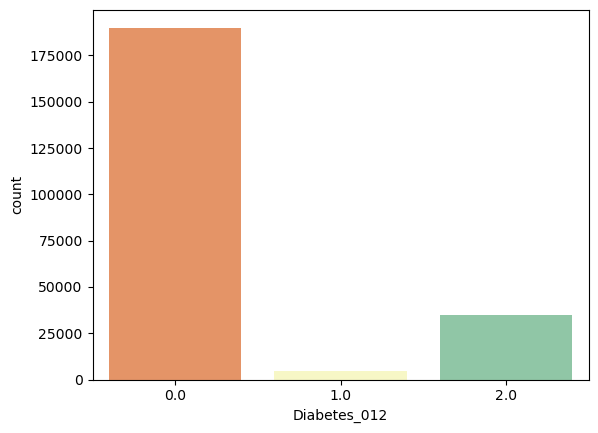

In [15]:
# plt.plot(df['Diabetes_012'].value_counts())
sns.countplot(data=df, x='Diabetes_012',palette='Spectral')

In [16]:
percent_dibatic = (df['Diabetes_012']==2).sum()/(df['Diabetes_012']).count()*100
print(f"{percent_dibatic:.2f}% of people reported diabetic in this dataset.")

15.27% of people reported diabetic in this dataset.


In [17]:
#Identify numerical columns i.e. non-object features like int, float - It is observed this dataset contain only numerical features.
num_cols = df.select_dtypes(exclude = ['object']).columns.tolist()
print(num_cols)

['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [18]:
#Creating the categories of column as complete dataset has been converted to numerical value.
target_feature =  ['Diabetes_012']
numerical_features = ['BMI', 'Sex', 'Age', 'Education', 'Income','GenHlth','MentHlth', 'PhysHlth']
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

* Data visualization by plotting distribution of numeric features using histograms and boxplots.
* For categorical features, use bar plots to visualize the frequency of each category.

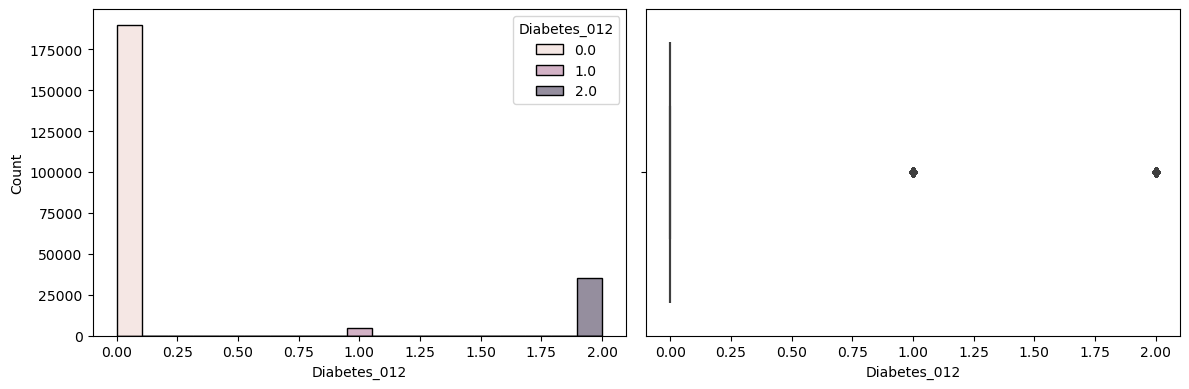

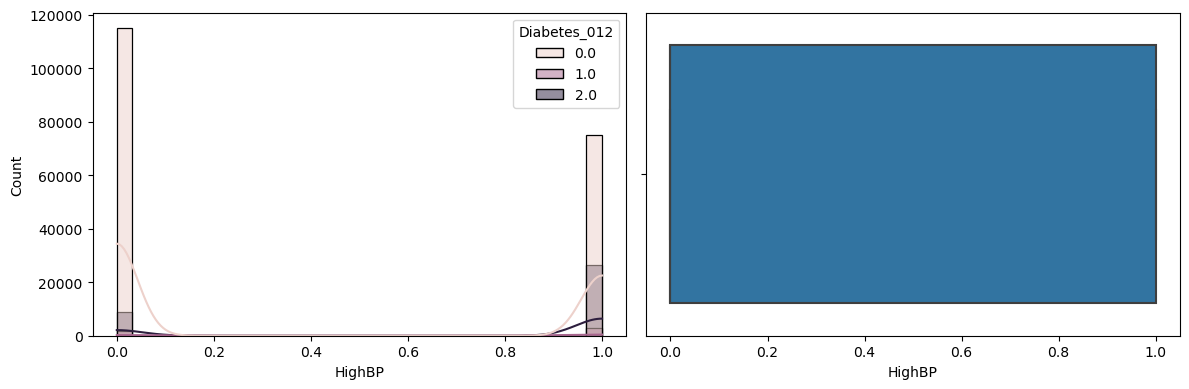

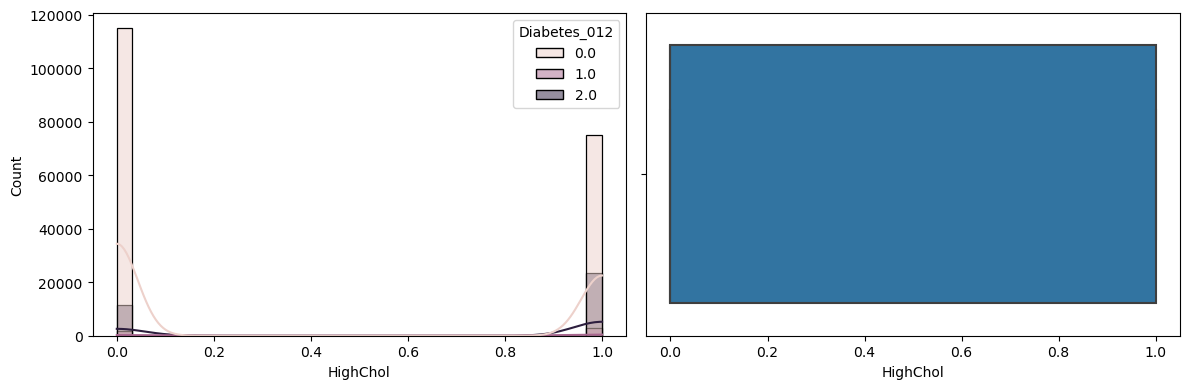

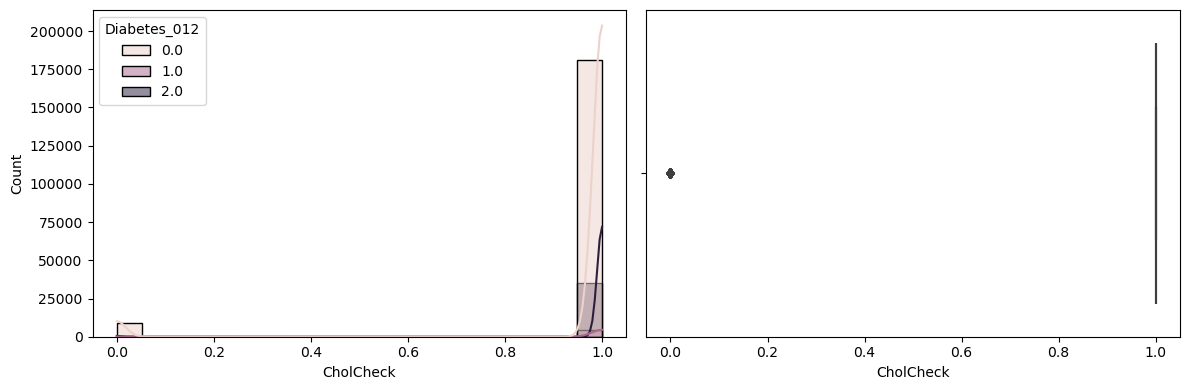

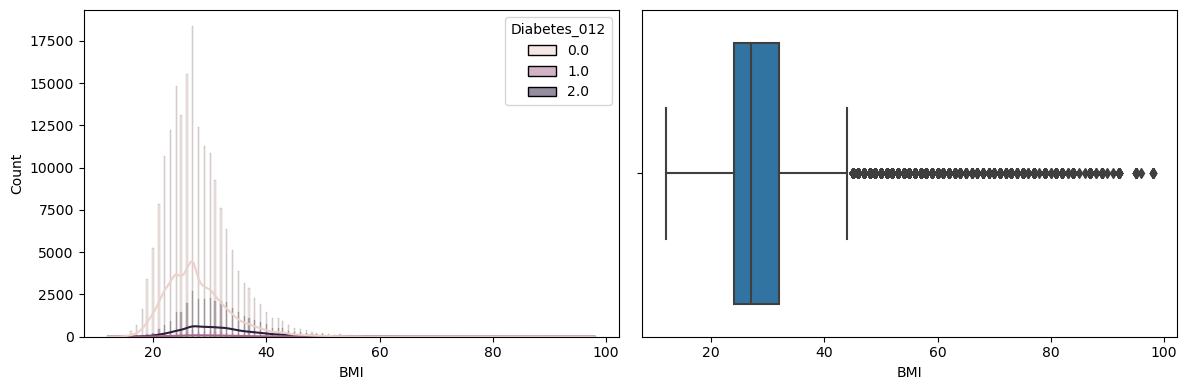

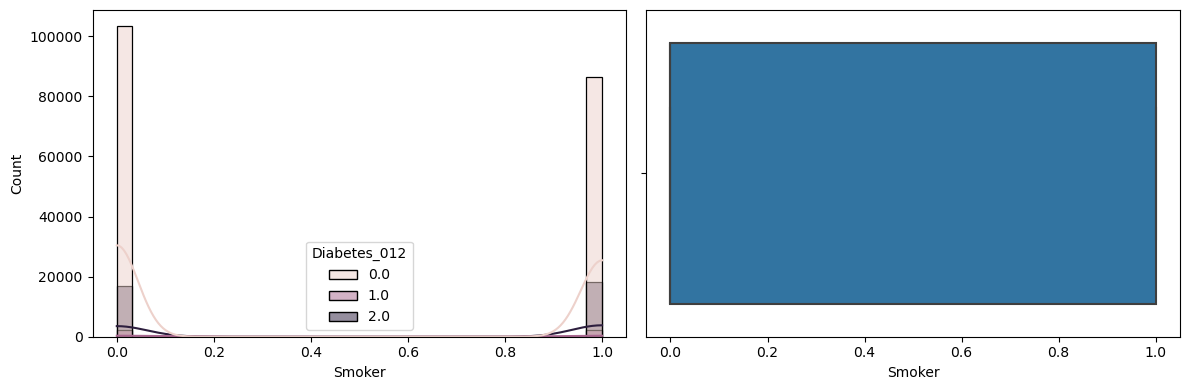

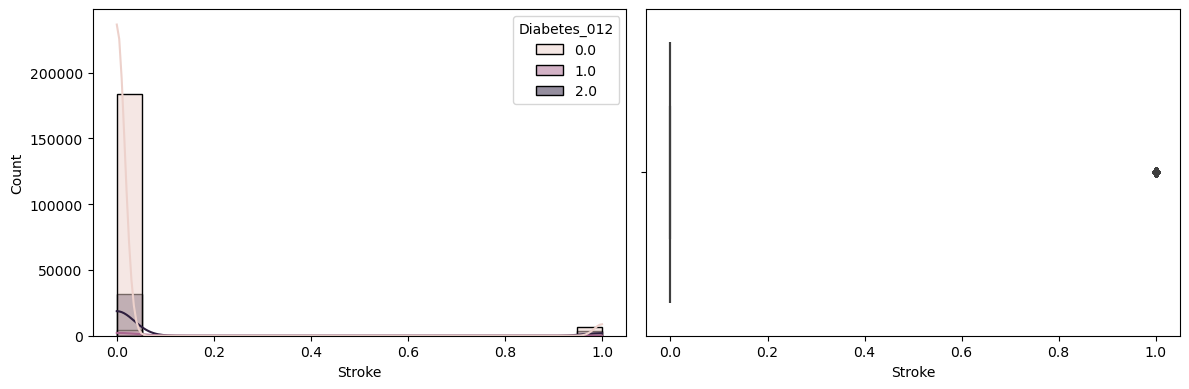

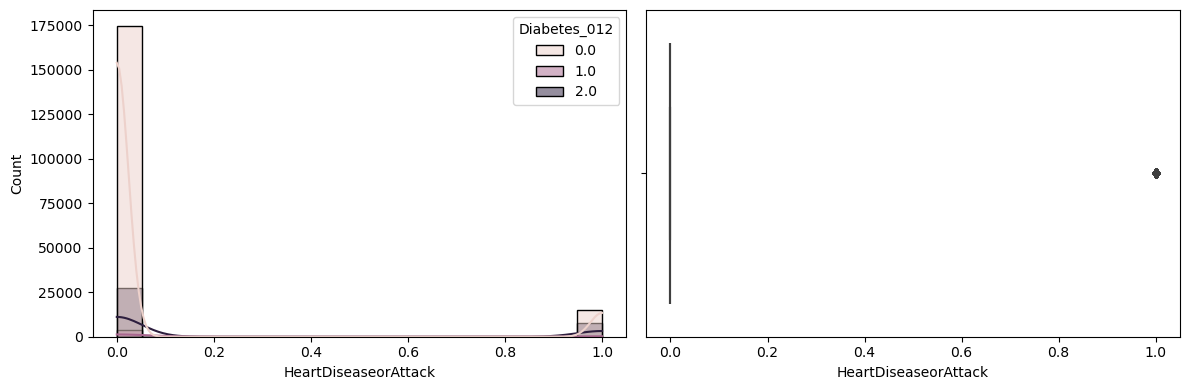

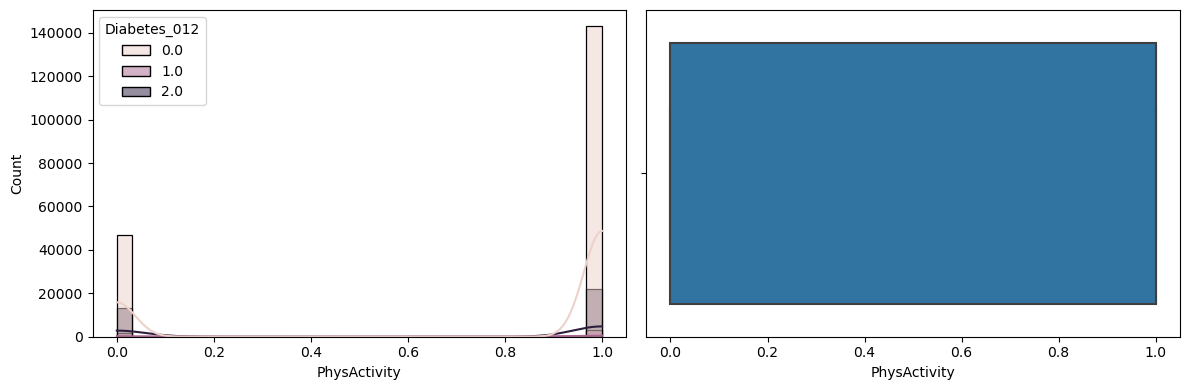

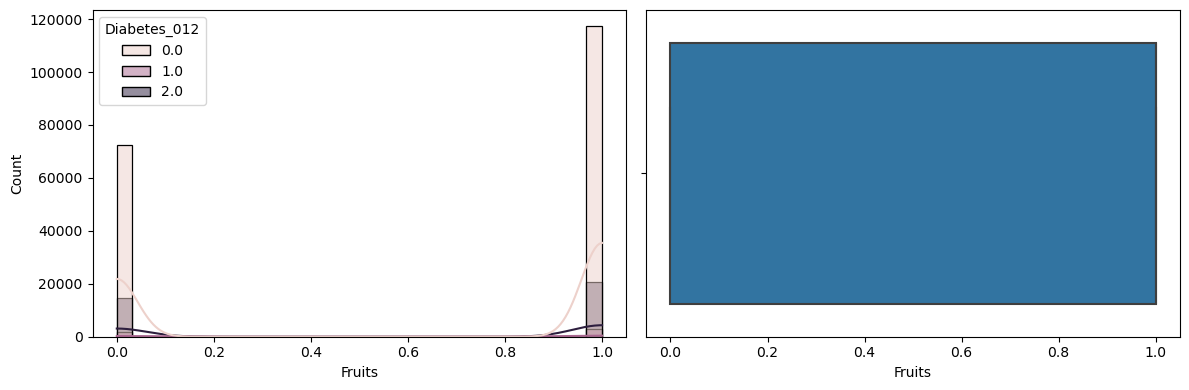

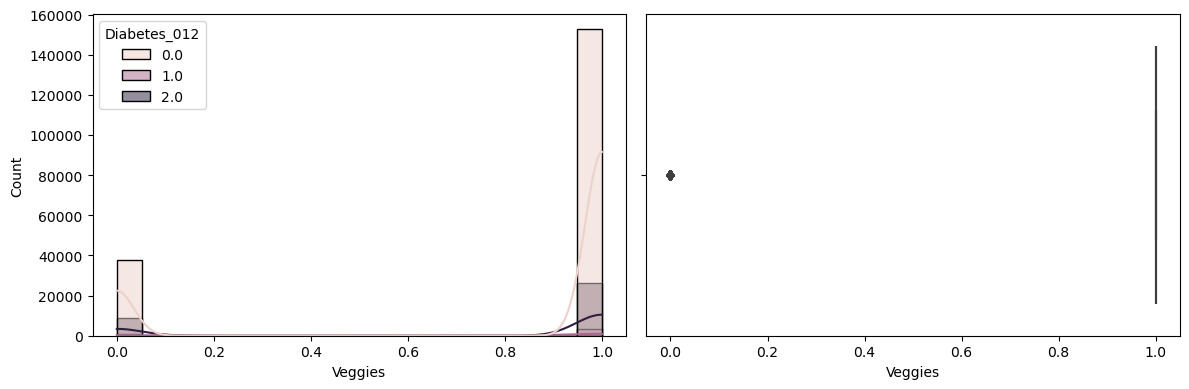

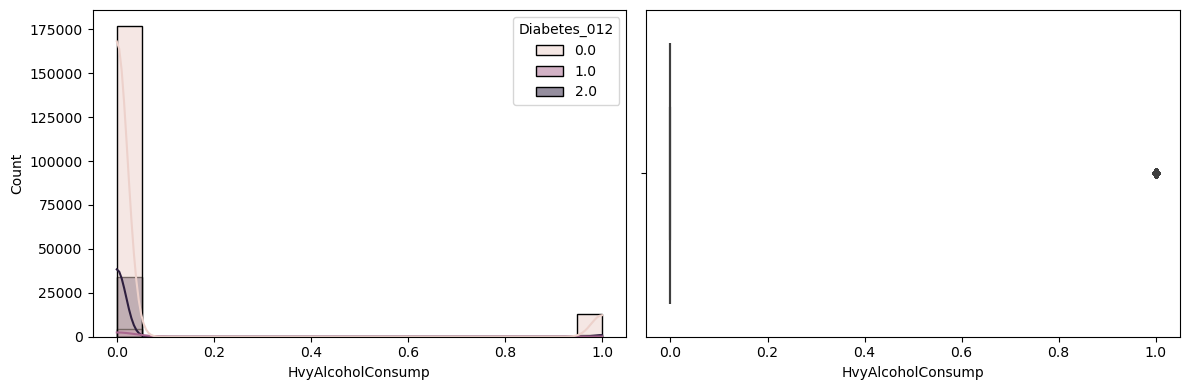

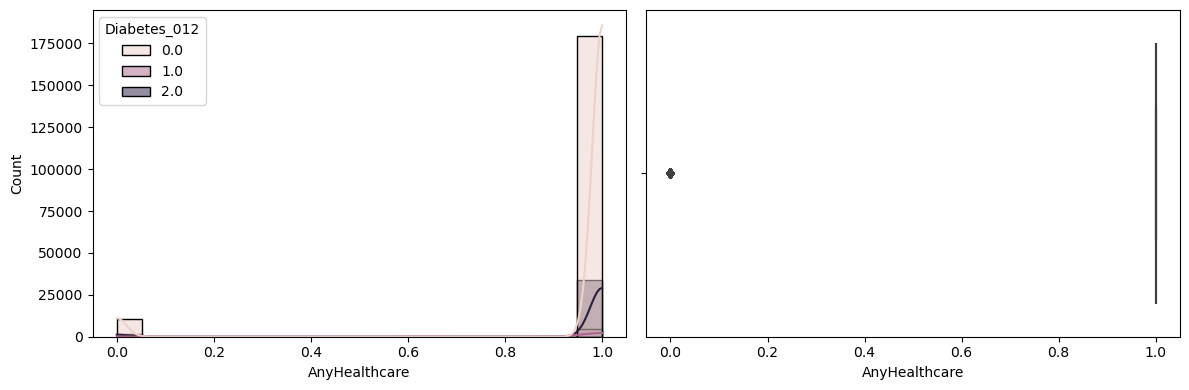

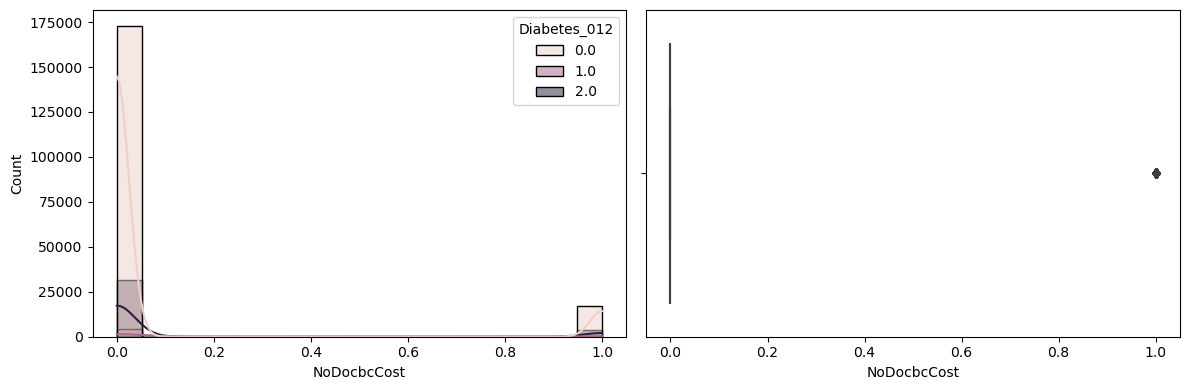

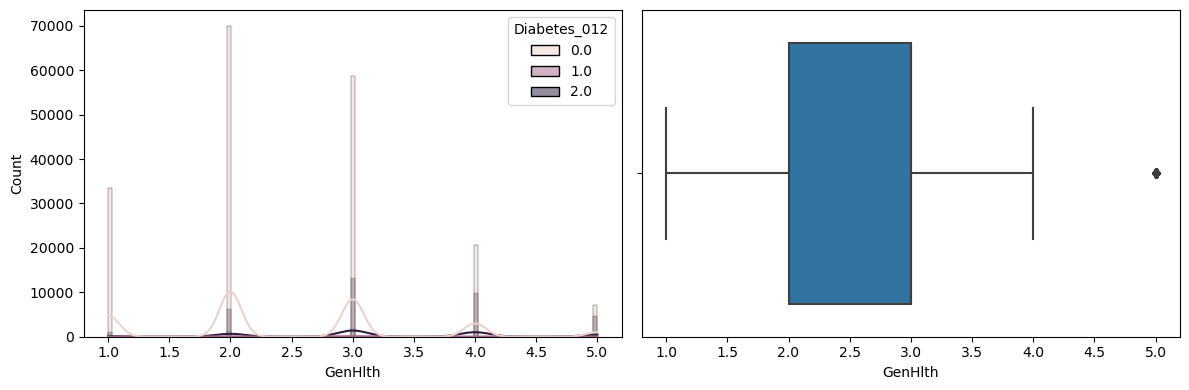

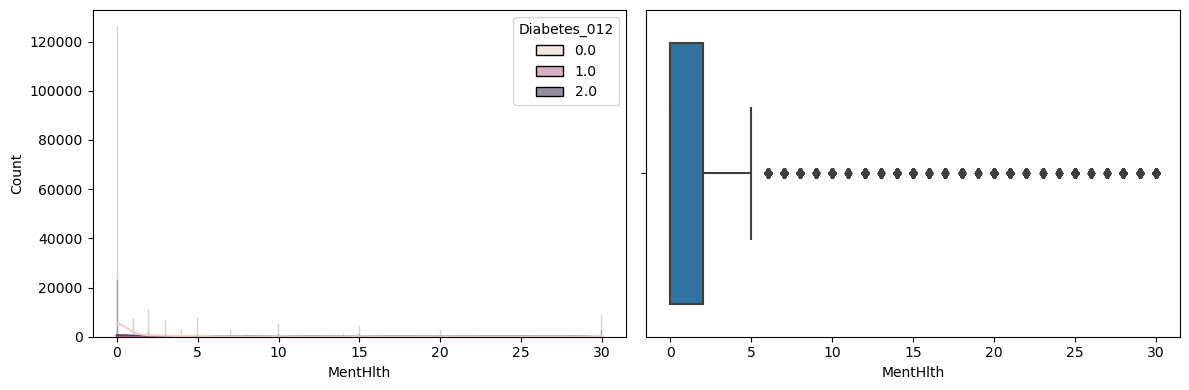

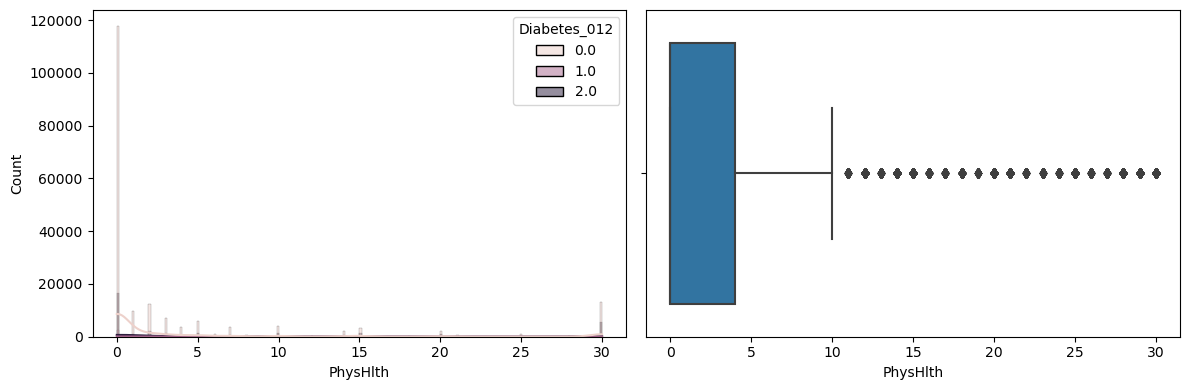

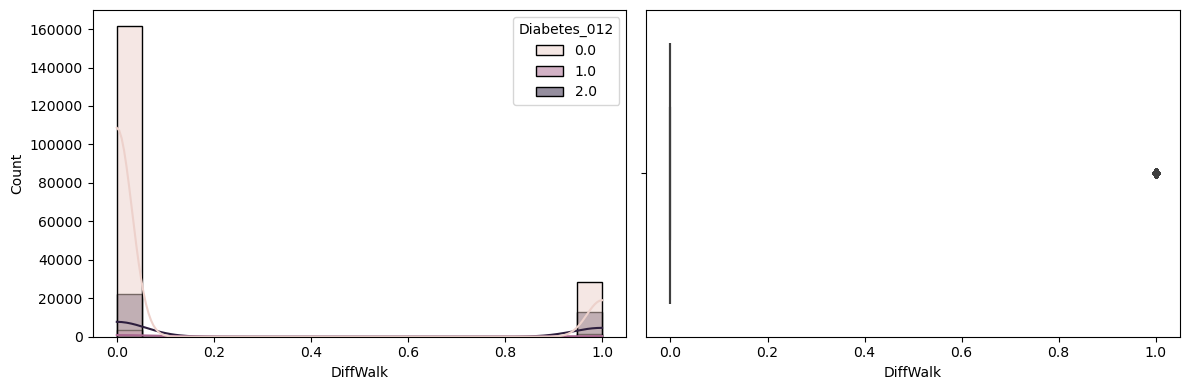

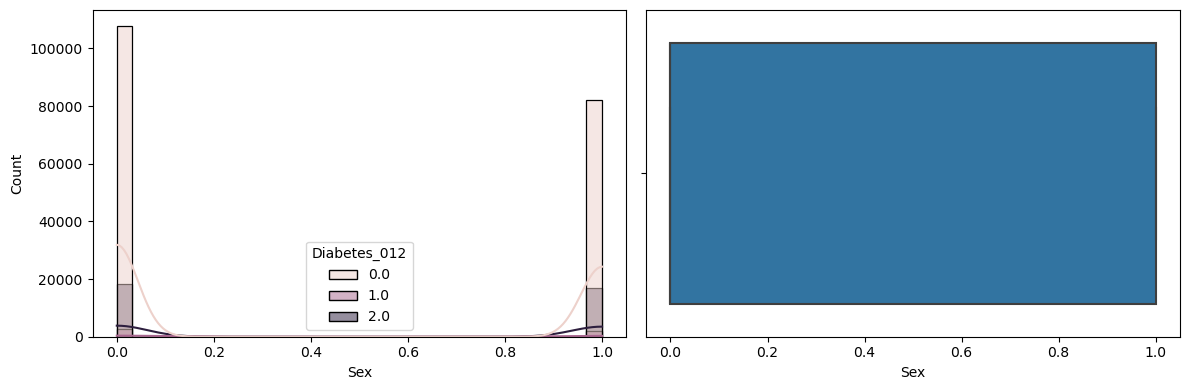

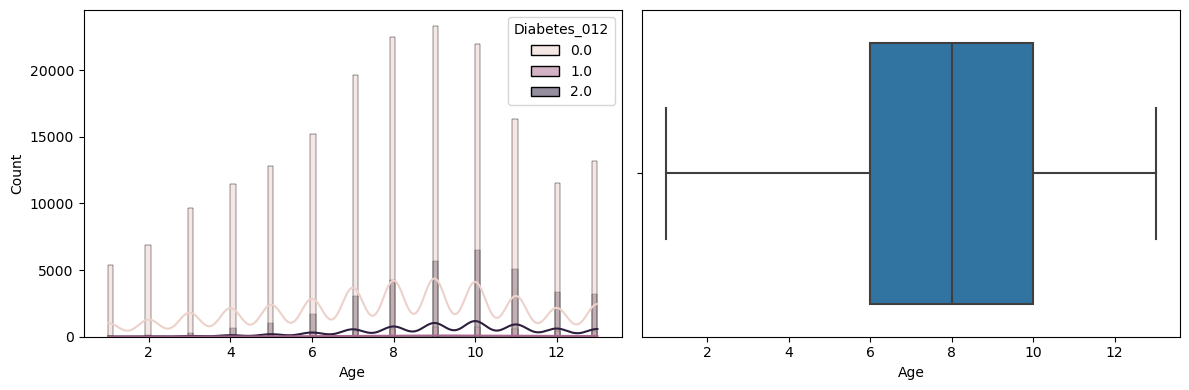

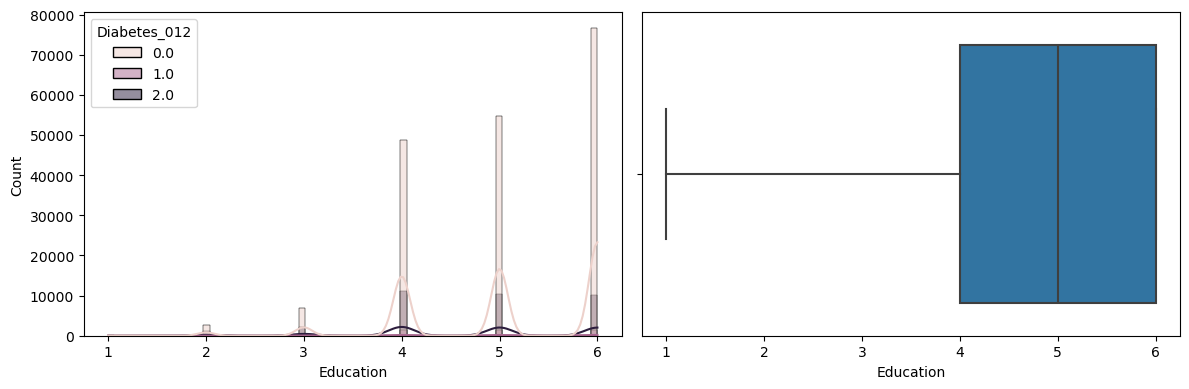

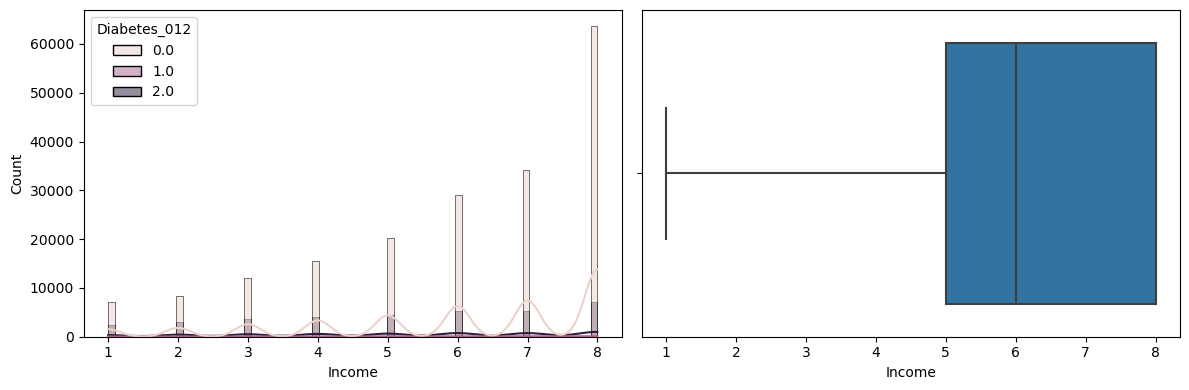

In [19]:
#Use the numerical columns to plot all the box-plots and histograms with hue on if it was success or not
for name in num_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df,x=name,kde=True,hue='Diabetes_012')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df,x=name)
    plt.tight_layout()

### **Summary for visual analysis -**

- From the histogram noticed number of people have diabetes is same for difficulty to work or not. But people without diffciulty to walk and doesn't have diabetes is significantly more.
- Both male and female has similar number of people with diadetes. More surveyed male has diabetes.
- There are similar obervations with respect to other categorical features.

- More people with high BP are also diabetic

- More people with high cholesterol are also diabetic

- People who regularly check cholesterol also diabetic

- People with BMI in the range ot 25-30 shows higher diabetes 

- Smoker or non-smoker both have same number diabetic people

- Interesting note , people who reported no stroke are having more diabetic, but there also more number of people who did not reporte stroke. This feature can be removed in future modelling


- Similar pattern for heart disease. This feature can be removed in future modelling

- Ratio of people who do regular physical activity are less diabetic compared to less physical activity

- Eating more fruit and vegetables improves chances of no diabetes.

- Very few people reported as heavy drinker so not very conclusive on diabetes. This feature can be removed in future modelling

- Very few people reported no medical insurance. This feature can be removed in future modelling

- Very few people reported they couldn't visit doc because of cost. This feature can be removed in future modelling

- Surprisingly people who place themselves in good general health are more diabetic on the scale of 1-5 where in non-diabetic at both ends.

- Most people reported very few to no physical or mental issue in last 30 days

- Most people reported no difficulty in walking but also have high diabetic number

- Both male and female participants have same ratio of diabetic patient 

- For the age group 50-80 most people are diabetic, based on the ratio age group 45 and above seems to have a higher diabetes ratio. Younger people are less likely to be diabetic and 40-45 is when more people start having diabetes.

- Mmore people reported education above high school. Ratio of diabetic patients doesn't seem to be influenced by higher education.

- More people in lower income brackets reported diabetes , this is mostly because of affordability of good diet.



### Correlation Analysis 
- Visualize and analyse the correlation matrix for numeric features.
- Explore relationships between all the features with respect to target feature.


Text(0.5, 1.0, 'Correlation Matrix ')

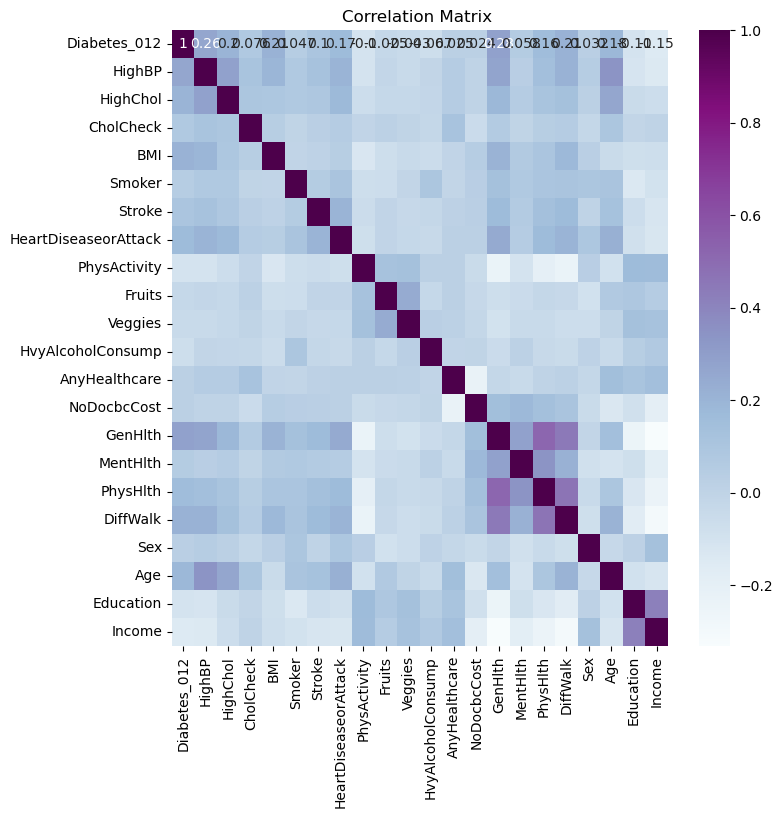

In [20]:
#Corelation metrics for all the numerical columns
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='BuPu')
plt.title('Correlation Matrix ')

### Most noticable correlation 
- Eduction is in high co-relation to income.
- Helth features are highly co-related
- Age is high co-relation with high BP
- Age, general health, high BP have higher co-relation to diabetes in comparision to other features.

In [21]:
# Commenting out as it takes about 45 min to process the pairplot on local laptop. Hence included as markdown image below.
# sns.pairplot(df, hue='Diabetes_012')
# plt.show()

<center>
    <img src = ../images/all_attr_pairplot.png width="100%"/>
</center>

In [22]:
#All categorical columns i.e. features of type object
categorical_cols = df.select_dtypes(exclude = ['object']).columns.tolist()
print(categorical_cols)

['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [23]:
df['HighBP'].head(3)

0    1.0
1    0.0
2    1.0
Name: HighBP, dtype: float64

In [24]:
df_temp = df.copy()
df_temp['HighBP'] = df['HighBP'].astype(str)
df_temp['Diabetes_012'] = df['Diabetes_012'].astype(str)


In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  object 
 1   HighBP                229781 non-null  object 
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

<Axes: xlabel='HighBP', ylabel='count'>

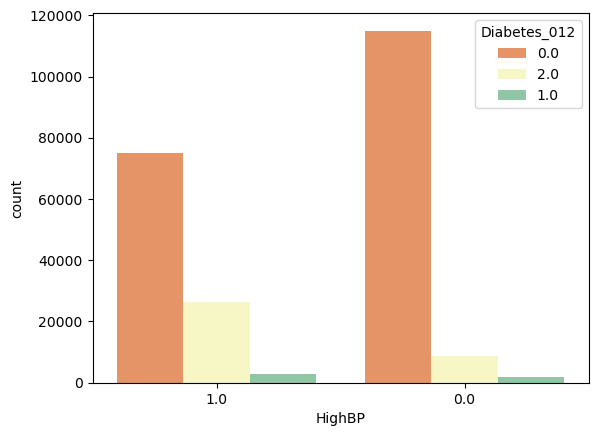

In [26]:
sns.countplot(data=df_temp, x='HighBP', hue='Diabetes_012', palette='Spectral')

### 4: Understanding the Task

#### Businness Objective
Goal of this project is to analyse the survey conducted by CDC and verify if it can accurately predict if a person has diabetes or not. What factor influence if person has diabetes. The information learnt can be helpful in promoting programs to reduce diabetes. This analysis will also help optimize the survey program itslef for better particiapation. This can be done by removing the questions which are not providing much meaningful information to the predictions. Which will help shorten the survey and can potentially improve participation number of survey. Various supervised learning tehcniques to be tested and choose the best that fits among - K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.

To solve this problem and provide answer to our main question we are going to use the widely known CRISP-DM framework.


### 5: Engineering Features

Preparation of target columns and features for analysis.

In [27]:
print("Target columns and size : ",len(target_feature), target_feature)
print("Categorical columns and size : ",len(categorical_features), categorical_features)
print("Numerical columns and size : ",len(numerical_features), numerical_features)

Target columns and size :  1 ['Diabetes_012']
Categorical columns and size :  13 ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
Numerical columns and size :  8 ['BMI', 'Sex', 'Age', 'Education', 'Income', 'GenHlth', 'MentHlth', 'PhysHlth']


In [28]:
# Preprocessor for logistic, KNN, SVM apply standard scale on numerical features and ordinal encoder on categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.drop('Diabetes_012',axis=1).columns)
    ])


In [29]:
#Label Encode y to obtain a Boolean
df_features = df.drop('Diabetes_012',axis=1)
df_target = pd.DataFrame(df['Diabetes_012'])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_target['Diabetes_012'] = le.fit_transform(df_target['Diabetes_012'])
df_target['Diabetes_012'].value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

In [30]:
df_features.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [31]:
df_features_trnsf = preprocessor.fit_transform(df_features)
df_features_trnsf

array([[ 1.09567501,  1.12413247,  0.20535591, ...,  0.29524111,
        -0.98758781, -1.38132379],
       [-0.91267939, -0.88957488, -4.86959434, ..., -0.35121265,
         1.0267291 , -2.33713069],
       [ 1.09567501,  1.12413247,  0.20535591, ...,  0.29524111,
        -0.98758781,  1.00819343],
       ...,
       [-0.91267939, -0.88957488,  0.20535591, ..., -1.96734705,
         0.01957065, -1.85922724],
       [ 1.09567501, -0.88957488,  0.20535591, ..., -0.35121265,
         0.01957065, -2.33713069],
       [ 1.09567501,  1.12413247,  0.20535591, ...,  0.29524111,
         1.0267291 , -1.85922724]])

In [32]:
numerical_features+categorical_features

['BMI',
 'Sex',
 'Age',
 'Education',
 'Income',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk']

In [33]:
df_features_trnsf.shape

(229781, 21)

In [34]:
df_features_trnsf_df = pd.DataFrame(df_features_trnsf, columns=df_features.columns)
df_features_trnsf_df.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.095675,1.124132,0.205356,1.667220,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,0.508092,...,0.238745,-0.319852,2.253111,1.879074,1.141300,2.095383,-0.885023,0.295241,-0.987588,-1.381324
1,-0.912679,-0.889575,-4.869594,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-1.258473,-1.968149,...,-4.188578,3.126450,0.374618,-0.454434,-0.516791,-0.477240,-0.885023,-0.351213,1.026729,-2.337131
2,1.095675,1.124132,0.205356,-0.101037,-0.933526,-0.216455,-0.339257,-1.658403,0.794614,-1.968149,...,0.238745,3.126450,2.253111,3.434746,2.799391,2.095383,-0.885023,0.295241,-0.987588,1.008193
3,1.095675,-0.889575,0.205356,-0.248391,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.477240,-0.885023,0.941695,-1.994746,0.052387
4,1.095675,1.124132,0.205356,-0.690456,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.065516,-0.516791,-0.477240,-0.885023,0.941695,0.019571,-0.903420


- Applied StandardSclaer on numerical columns.
- Applied label encoding on the target column.

### 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [35]:
#Split the data 70/30
X = df_features_trnsf_df
y = df_target['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [36]:
X_train.shape, X_test.shape


((160846, 21), (68935, 21))

In [37]:
y_train.shape, y_test.shape


((160846,), (68935,))

### 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

**Using dummy classifier with uniform - Random Classifier**
- Randomly assigns a class to each test instance

Random Classifier Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.83      0.33      0.47     57017
           1       0.02      0.35      0.04      1389
           2       0.16      0.34      0.21     10529

    accuracy                           0.33     68935
   macro avg       0.33      0.34      0.24     68935
weighted avg       0.71      0.33      0.43     68935



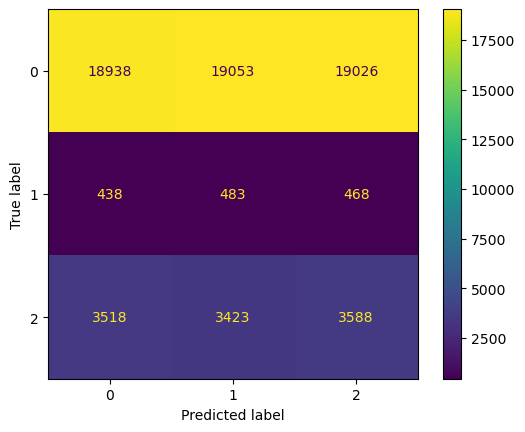

In [38]:
#Using dummy classifier with uniform
random_clf = DummyClassifier(strategy="uniform")
random_clf.fit(X_train, y_train)

# Make predictions
y_pred = random_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Classifier Accuracy:", round(accuracy,2))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


**Using dummy classifier with most_frequent**
-	Serves as a baseline to compare more complex models.
-	Helps detect issues in dataset imbalance.
-	Provides an upper bound on trivial models

Most Frequent Classifier Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     57017
           1       0.00      0.00      0.00      1389
           2       0.00      0.00      0.00     10529

    accuracy                           0.83     68935
   macro avg       0.28      0.33      0.30     68935
weighted avg       0.68      0.83      0.75     68935



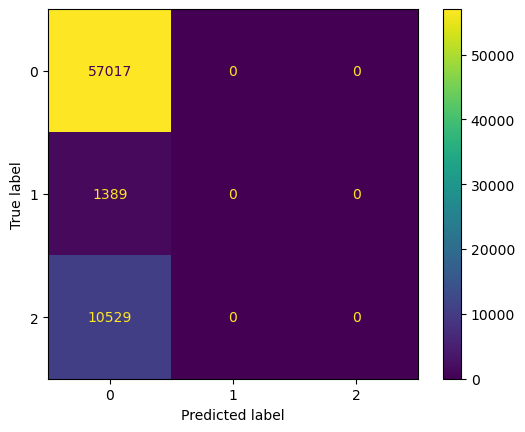

In [39]:
#Using dummy classifier with most_frequent
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred_most_frequent = dummy_clf.predict(X_test)

# Evaluate performance
accuracy_most_frequent = accuracy_score(y_test, y_pred_most_frequent)
print("Most Frequent Classifier Accuracy:", round(accuracy_most_frequent,2))
print(classification_report(y_test, y_pred_most_frequent))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_most_frequent)


- Start with a simple baseline before using complex models.
- Choose a baseline based on dataset characteristics (balanced, imbalanced etc)
- Using uniform helps predict the pre-diabetese and diabetes.

### 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [40]:
# Using simple logistic regression model
simple_log_reg = LogisticRegression()

# Fit the model on training data set
simple_log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = simple_log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     57017
           1       0.00      0.00      0.00      1389
           2       0.54      0.17      0.26     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.38      0.39     68935
weighted avg       0.78      0.83      0.79     68935



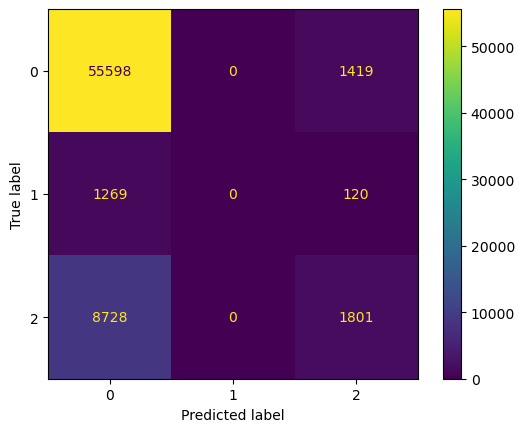

In [41]:
print(classification_report(y_test, y_pred_log_reg))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg)


### 9: Score the Model

What is the accuracy of your model?

In [42]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", round(accuracy_log_reg,2))

Logistic Regression Accuracy: 0.83


### 10: Model Comparisons

After evaluting the dummy classifer and basic liner regression model we are going to compare the classification models with all the default setting. Following models to be used :

- LogisticRegression
- DecisionTreeClassifier
- KNeighborsClassifier
- LinearSVC
- SVC

In [43]:
# Initialize all models which will be compared
all_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'LinearSVM': LinearSVC(),
    'SVM-1000': SVC(probability=True, cache_size=2000,max_iter=1000)
}

- multi_class= OVR average=micro : This aligns with micro averaging because it computes a single ROC curve by considering all samples.
-	It treats the problem as a binary classification, consistent with micro precision/recall.

In [44]:
#Train and evalute all the models those were identified 
results = {}

for name, model in all_models.items():
    print(model)
    # record the start and end time to identify training time
    start_t = time.time()
    model.fit(X_train, y_train)
    end_t = time.time()
    fit_t = end_t - start_t
    #accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    y_pred_mod = model.predict(X_test)
    #scoring
    precision = precision_score(y_test, y_pred_mod,average='micro')
    recall = recall_score(y_test, y_pred_mod,average='micro')
    f1 = f1_score(y_test, y_pred_mod,average='micro')

    if name=='LinearSVM':
        clf = CalibratedClassifierCV(model) 
        clf.fit(X_train, y_train)
        pred_class = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)
    else:
        y_prob = model.predict_proba(X_test)

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Converts to 3 binary columns
    auc = roc_auc_score(y_test, y_prob,multi_class='ovr', average='micro')


    ###

    noavg_precision = precision_score(y_test, y_pred_mod, average=None, zero_division=0.0)
    noavg_recall = recall_score(y_test, y_pred_mod, average=None)
    noavg_f1 = f1_score(y_test, y_pred_mod, average=None)

    precision_rounded_noavg = [round(p, 2) for p in noavg_precision]
    recall_rounded_noavg = [round(r, 2) for r in noavg_recall]
    f1_rounded_noavg = [round(f, 2) for f in noavg_f1]

    n_classes = 3
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 
    fpr_noavg , tpr_noavg , thresholds_noavg, auc_score_noavg  = {}, {}, {}, {}
    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr_noavg[i], tpr_noavg[i], thresholds_noavg[i] = roc_curve(y_test_bin[:, i], y_prob[:, i])
        auc_score_noavg[i] = round(roc_auc_score(y_test_bin[:, i], y_prob[:, i]),2)

    # Calculate ROC curve and AUC for micro-average
    fpr_micro_noavg, tpr_micro_noavg, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc_micro_noavg = round(roc_auc_score(y_test_bin, y_prob, average='micro'),2)

    # Calculate ROC curve and AUC for macro-average
    # Macro-average does not have its own fpr and tpr; it's an aggregate of individual class curves
    roc_auc_macro_noavg= round(roc_auc_score(y_test_bin, y_prob, average='macro'),2)  

    ###

    #compile the result in an array
    results[name] = {
        'Model': name,
        'Train Time': fit_t,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'precision':precision,
        'recall': recall,
        'f1': f1,
        'AUC_ovr_micro': auc,
        'y pred': y_pred_mod,
        'y_prob': y_prob,
        'ROC_AUC': auc_score_noavg,
        'precision_noavg': precision_rounded_noavg,
        'recall_noavg': recall_rounded_noavg,
        'f1_noavg': f1_rounded_noavg,
        'fpr': fpr_noavg,
        'tpr': tpr_noavg,
        'thresholds': thresholds_noavg,
        'fpr_micro': fpr_micro_noavg,
        'tpr_micro': tpr_micro_noavg,
        'roc_auc_micro': roc_auc_micro_noavg,
        'roc_auc_macro': roc_auc_macro_noavg

    }

    print(f"{name}: Train Time = {fit_t:.2f}, Train Accuracy = {train_accuracy:.2f}, Test Accuracy = {test_accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2f}, AUC = {auc:.2f}")

LogisticRegression()
Logistic Regression: Train Time = 0.78, Train Accuracy = 0.83, Test Accuracy = 0.83, Precision = 0.83, Recall = 0.83, F1 = 0.83, AUC = 0.95
DecisionTreeClassifier()
Decision Tree: Train Time = 0.45, Train Accuracy = 0.99, Test Accuracy = 0.74, Precision = 0.74, Recall = 0.74, F1 = 0.74, AUC = 0.80
KNeighborsClassifier()
KNN: Train Time = 0.01, Train Accuracy = 0.86, Test Accuracy = 0.81, Precision = 0.81, Recall = 0.81, F1 = 0.81, AUC = 0.92
LinearSVC()
LinearSVM: Train Time = 1.17, Train Accuracy = 0.83, Test Accuracy = 0.83, Precision = 0.83, Recall = 0.83, F1 = 0.83, AUC = 0.95
SVC(cache_size=2000, max_iter=1000, probability=True)
SVM-1000: Train Time = 131.82, Train Accuracy = 0.59, Test Accuracy = 0.59, Precision = 0.59, Recall = 0.59, F1 = 0.59, AUC = 0.89


In [45]:
results_df = pd.DataFrame(results).transpose().reset_index(drop=True)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy,precision,recall,f1,AUC_ovr_micro,y pred,y_prob,...,precision_noavg,recall_noavg,f1_noavg,fpr,tpr,thresholds,fpr_micro,tpr_micro,roc_auc_micro,roc_auc_macro
0,Logistic Regression,0.780549,0.831317,0.832654,0.832654,0.832654,0.832654,0.948702,"[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.8718242753943047, 0.01121217425476418, 0.1...",...,"[0.85, 0.0, 0.54]","[0.98, 0.0, 0.17]","[0.91, 0.0, 0.26]","{0: [0.0, 0.0, 0.0, 8.39066957543212e-05, 8.39...","{0: [0.0, 1.753862882999807e-05, 0.00385849834...","{0: [inf, 0.9981508648788844, 0.99449643812698...","[0.0, 0.0, 0.0, 7.253209545223761e-06, 7.25320...","[0.0, 1.4506419090447522e-05, 0.00319141219989...",0.95,0.77
1,Decision Tree,0.451624,0.994237,0.738899,0.738899,0.738899,0.738899,0.803855,"[2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, ...","[[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, ...",...,"[0.86, 0.03, 0.28]","[0.83, 0.04, 0.31]","[0.85, 0.03, 0.3]","{0: [0.0, 0.6474240644403423, 0.65505957375398...","{0: [0.0, 0.826595576757809, 0.834768577792588...","{0: [inf, 1.0, 0.5, 0.3333333333333333, 0.0], ...","[0.0, 0.12983245085950534, 0.13421338942482047...","[0.0, 0.7319794008848916, 0.7396097773264669, ...",0.8,0.56
2,KNN,0.008782,0.856832,0.814318,0.814318,0.814318,0.814318,0.919336,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.6, 0.0, ...",...,"[0.85, 0.04, 0.4]","[0.95, 0.0, 0.2]","[0.9, 0.0, 0.27]","{0: [0.0, 0.22101023661688202, 0.5109078704480...","{0: [0.0, 0.563445989792518, 0.816405633407580...","{0: [inf, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0], 1: [i...","[0.0, 0.019881047363458332, 0.0497062450134184...","[0.0, 0.4679045477623849, 0.6848045260027562, ...",0.92,0.65
3,LinearSVM,1.169551,0.831124,0.831711,0.831711,0.831711,0.831711,0.948499,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.8624825958027614, 0.010314028894839206, 0....",...,"[0.84, 0.0, 0.59]","[0.99, 0.0, 0.09]","[0.91, 0.0, 0.15]","{0: [0.0, 0.0, 0.0, 8.39066957543212e-05, 8.39...","{0: [0.0, 1.753862882999807e-05, 0.00185909465...","{0: [inf, 0.9952015835204872, 0.99106075870463...","[0.0, 0.0, 0.0, 7.253209545223761e-06, 7.25320...","[0.0, 1.4506419090447522e-05, 0.00153768042358...",0.95,0.77
4,SVM-1000,131.82269,0.589949,0.588583,0.588583,0.588583,0.588583,0.892314,"[0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, ...","[[0.8371453148845507, 0.020938568848915203, 0....",...,"[0.81, 0.03, 0.12]","[0.66, 0.0, 0.26]","[0.73, 0.0, 0.17]","{0: [0.0, 8.39066957543212e-05, 0.000251720087...","{0: [0.0, 0.0, 0.0, 5.2615886489994215e-05, 5....","{0: [inf, 0.8711232887291785, 0.86936813578536...","[0.0, 7.253209545223761e-06, 2.175962863567128...","[0.0, 0.0, 0.0, 4.351925727134257e-05, 4.35192...",0.89,0.44


- SVM max_itr=1000 was set as the data set is large and cannot be processed on the laptop. Even with lower iteration number it took about 2min to train the model. 
- Will explore LinerSVM instead.
- Multiple iteration on the SVC were perfomed to have the model excution complete on the local laptop.
- Changing the cache size alone did not help had to reduce the max-iteration for it to complete. This impact the overall score and accuracy of the model.
- Based on default settings the best training time is for KNN with good AUC 99%, Accuracy 86% and other scores too.
- The best model AUC is for LogisticRegression i.e .95 which is same as LinearSVM.

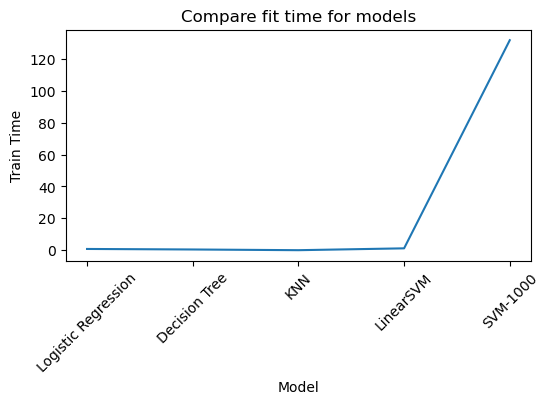

In [46]:
plt.figure(figsize=(6,3))
sns.lineplot(results_df, x='Model', y='Train Time').set(title='Compare fit time for models')
plt.xticks(rotation=45)
plt.show()

0.81
[0.         0.         0.         ... 0.99949656 0.99949656 1.        ]
[0.00000000e+00 1.75386288e-05 3.85849834e-03 ... 9.99877230e-01
 1.00000000e+00 1.00000000e+00]
0.59
[0.         0.64742406 0.65505957 0.65514348 1.        ]
[0.         0.82659558 0.83476858 0.83494396 1.        ]
0.71
[0.         0.22101024 0.51090787 0.77059909 0.92330928 0.98380601
 1.        ]
[0.         0.56344599 0.81640563 0.93435291 0.98289984 0.99743936
 1.        ]
0.81
[0.         0.         0.         ... 0.99958047 0.99958047 1.        ]
[0.00000000e+00 1.75386288e-05 1.85909466e-03 ... 9.99982461e-01
 1.00000000e+00 1.00000000e+00]
0.42
[0.00000000e+00 8.39066958e-05 2.51720087e-04 ... 9.99832187e-01
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.99989477 0.99989477 1.        ]


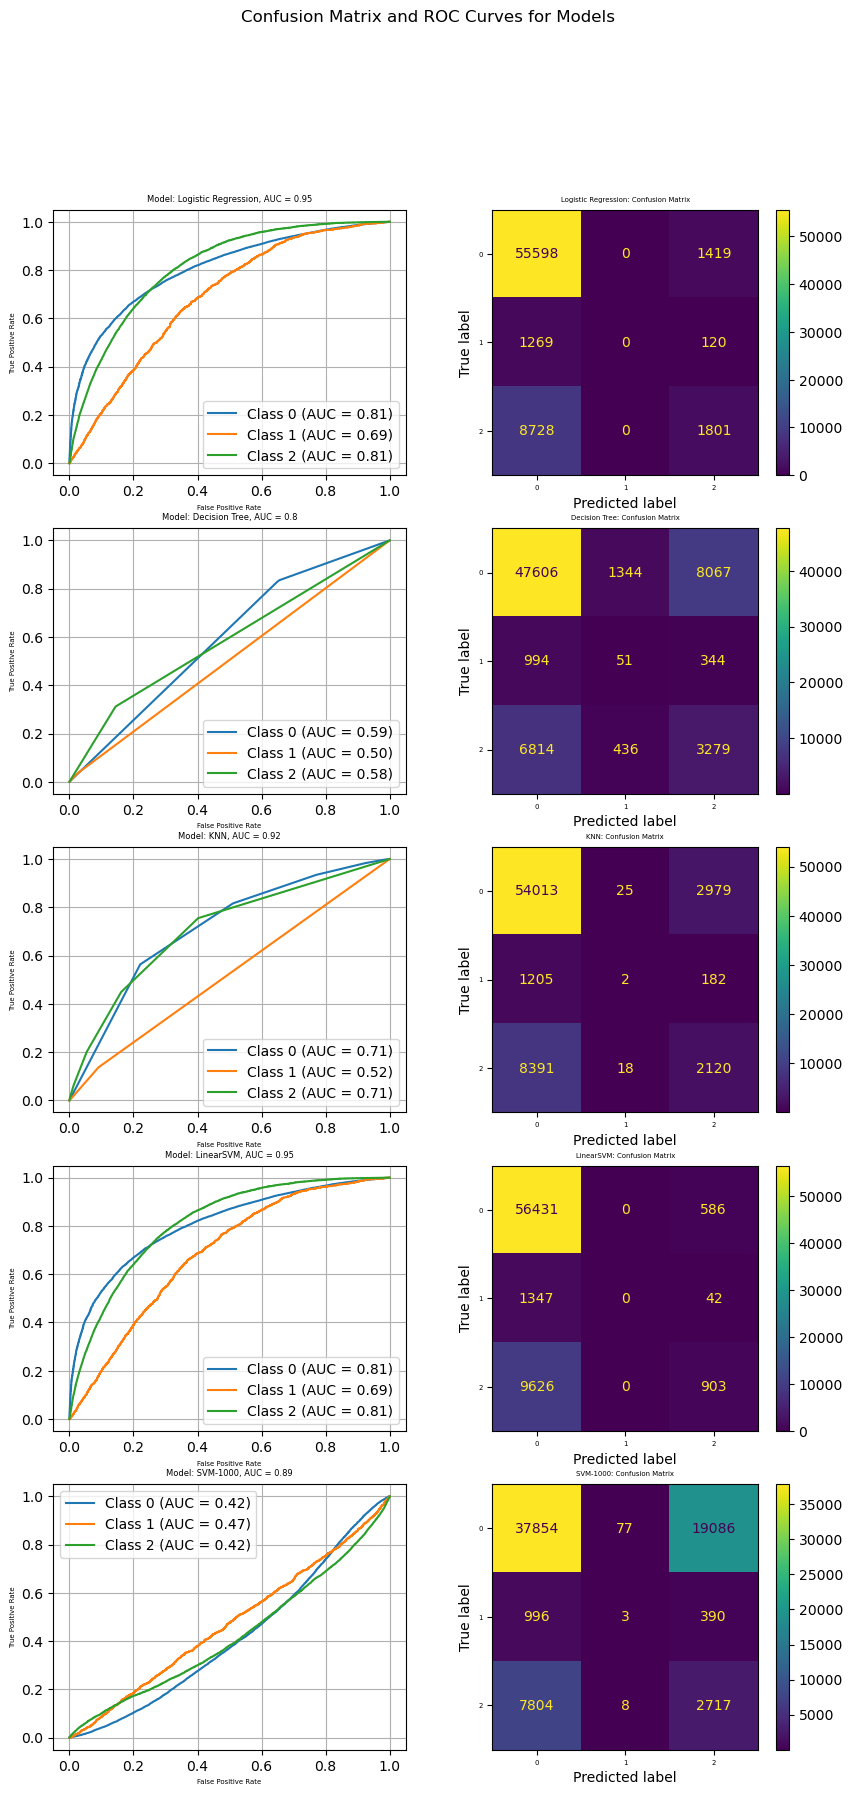

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [47]:
# Create a 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(10,20))
# Add a title for the entire figure
fig.suptitle('Confusion Matrix and ROC Curves for Models')  

plt_count = 0
fpr = {}
tpr = {}
roc_auc = {}
for index, row in results_df.iterrows():
    plt.figure(figsize=(10,15))

    model = row['Model']
    y_prob = row['y_prob']
    roc_auc = row['ROC_AUC']
    fpr=row['fpr']
    tpr=row['tpr']
    ax = axes.flat[plt_count]

    print(roc_auc[0])
    print(fpr[0])
    print(tpr[0])
    
    #Convert `y_true` into One-vs-Rest Format
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Converts to 3 binary columns

    plt.figure(figsize=(8, 6))

    for i in range(3):  # 3 classes
        ax.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        ax.set_xlabel('False Positive Rate',fontsize=5)
        ax.set_ylabel('True Positive Rate',fontsize=5)
        ax.set_title(f"Model: {model}, AUC = {round(row['AUC_ovr_micro'],2)}",fontsize=6)
        ax.legend()
        ax.grid(True)
        
    plt_count += 1

    y_pred = row['y pred']
    ax = axes.flat[plt_count] 
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"{model}: Confusion Matrix",fontsize=5)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
    plt_count += 1

plt.tight_layout()

plt.show()

### Sumary of defaul model analysis - 
- LogisticRegression (LinearSVM) and KNN scores are better.
- DecisionTree is close to random guess.
- SVN performed worst, predict opposite of correct labels. This was not in default setting due to try to fit the parameters to complete execution on local laptop.

### 11: Improving the Model


Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we remove any feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric
- Will keep the features as is and explore various options on the paratmeter tunning.

**LogisticRegression**
Perfom GridSearch on LogisticRegression with different value of parameters.

In [48]:
logreg_new = LogisticRegression()

logreg_params = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

logreg_grid = GridSearchCV(logreg_new, param_grid=logreg_params, cv=5, scoring='accuracy')

start_time = time.time()
logreg_grid.fit(X_train, y_train)
end_time = time.time()

In [49]:
logreg_execution_time = end_time - start_time

logreg_grid_best_params = logreg_grid.best_params_
logreg_grid_train_score = logreg_grid.score(X_train, y_train)
logreg_grid_test_score = logreg_grid.score(X_test, y_test)

print('logreg_grid_best_params: ', logreg_grid_best_params)
print('logreg_grid_train_score: ', round(logreg_grid_train_score,2))
print('logreg_grid_test_score: ', round(logreg_grid_test_score,2))
print('logreg_execution_time: ', round(logreg_execution_time,2), 's')

logreg_grid_best_params:  {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
logreg_grid_train_score:  0.83
logreg_grid_test_score:  0.83
logreg_execution_time:  173.28 s


In [50]:
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)

logreg_precision_score = precision_score(y_test, y_pred_logreg,average='micro')
logreg_recall_score = recall_score(y_test, y_pred_logreg,average='micro')
logreg_f1_score = f1_score(y_test, y_pred_logreg,average='micro')

print('logreg_precision_score: ', round(logreg_precision_score,2))
print('logreg_recall_score: ', round(logreg_recall_score,2))
print('logreg_f1_score: ', round(logreg_f1_score,2))

print(classification_report(y_test, y_pred_logreg))


logreg_precision_score:  0.83
logreg_recall_score:  0.83
logreg_f1_score:  0.83
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     57017
           1       0.00      0.00      0.00      1389
           2       0.56      0.13      0.21     10529

    accuracy                           0.83     68935
   macro avg       0.47      0.37      0.37     68935
weighted avg       0.78      0.83      0.78     68935



In [51]:
y_prob_logreg = logreg_grid.best_estimator_.predict_proba(X_test)#[:, 2]
auc_logreg = roc_auc_score(y_test, y_prob_logreg,multi_class='ovr', average='micro')



logreg_precision = precision_score(y_test, y_pred_logreg, average=None, zero_division=0.0)
logreg_recall = recall_score(y_test, y_pred_logreg, average=None)
logreg_f1 = f1_score(y_test, y_pred_logreg, average=None)

precision_rounded_logreg = [round(p, 2) for p in logreg_precision]
recall_rounded_logreg = [round(r, 2) for r in logreg_recall]
f1_rounded_logreg = [round(f, 2) for f in logreg_f1]

n_classes = 3
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 
fpr_logreg , tpr_logreg , thresholds_logreg, auc_score_logreg  = {}, {}, {}, {}
# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr_logreg[i], tpr_logreg[i], thresholds_logreg[i] = roc_curve(y_test_bin[:, i], y_prob_logreg[:, i])
    auc_score_logreg[i] = round(roc_auc_score(y_test_bin[:, i], y_prob_logreg[:, i]),2)

# Calculate ROC curve and AUC for micro-average
fpr_micro_logreg, tpr_micro_logreg, _ = roc_curve(y_test_bin.ravel(), y_prob_logreg.ravel())
roc_auc_micro_logreg = round(roc_auc_score(y_test_bin, y_prob_logreg, average='micro'),2)

# Calculate ROC curve and AUC for macro-average
# Macro-average does not have its own fpr and tpr; it's an aggregate of individual class curves
roc_auc_macro_logreg = round(roc_auc_score(y_test_bin, y_prob_logreg, average='macro'),2)  

print(f"AUC = {auc_logreg:.2f}")

AUC = 0.95


In [52]:
#Export the best LogisticRegression Model 
joblib.dump(logreg_grid.best_estimator_, "../deployments/LogisticRegression_allFeatures.model")

['../deployments/LogisticRegression_allFeatures.model']

In [53]:
cols = numerical_features+categorical_features
print(cols)


['BMI', 'Sex', 'Age', 'Education', 'Income', 'GenHlth', 'MentHlth', 'PhysHlth', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']


In [54]:
# Retrieve the coefficients
coeff = logreg_grid.best_estimator_.coef_[0]
intercept = logreg_grid.best_estimator_.intercept_[0]

# Create a DataFrame to display the coefficients along with their feature names
coeff_df = pd.DataFrame({
    'Feature': cols,
    'Coefficient': coeff
})
print("Intercept:", intercept)

Intercept: 1.85138037693466


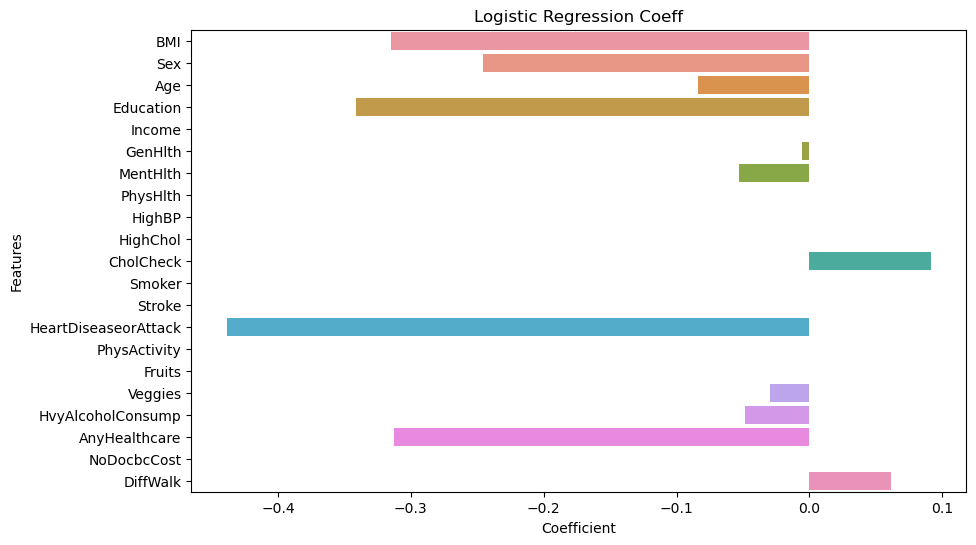

In [55]:
# Coefficients plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Logistic Regression Coeff')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

**KNN**
- Perform KNN analysis with differnet neighbors and weight values.
- Reduce the training set as KNN is not able to fit for large number of instance on the machine.
- Once GridSearchCV gives us the best parama, use that to fit the full training set and further analysis.

In [56]:
# This sample was used for experiment, keeping in the notebook
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, stratify=y_train, random_state=42)

In [57]:
# Use a smaller dataset for tuning

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': list(range(1, 22, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid = GridSearchCV(knn, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
knn_grid.fit(X_sample, y_sample)
end_time = time.time()

In [58]:
X_sample.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [59]:
knn_execution_time = end_time - start_time
knn_grid_best_params = knn_grid.best_params_
knn_grid_train_score = knn_grid.score(X_train, y_train)
knn_grid_test_score = knn_grid.score(X_test, y_test)
print('knn_grid_best_params: ', knn_grid_best_params)
print('knn_grid_train_score: ', round(knn_grid_train_score,2))
print('knn_grid_test_score: ', round(knn_grid_test_score,2))
print('knn_execution_time: ', round(knn_execution_time,2), 's')

knn_grid_best_params:  {'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}
knn_grid_train_score:  0.83
knn_grid_test_score:  0.83
knn_execution_time:  133.98 s


In [60]:
#Run KNN for best params
knn_grid_best_params=  {'n_neighbors': list(range(1, 21,2)), 'p': [1], 'weights': 'uniform'}
# knn_grid_best = GridSearchCV(knn, param_grid=knn_grid_best_params, cv=5, scoring='accuracy', n_jobs=-1)
best_KNN = KNeighborsClassifier(n_neighbors=21, p=1,weights='uniform')

start_time = time.time()
best_KNN_model= best_KNN.fit(X_train, y_train)
end_time = time.time()
knn_execution_time_1 = end_time - start_time
knn_execution_time_1


0.04388904571533203

In [61]:
y_pred_knn = best_KNN_model.predict(X_test)#knn_grid.best_estimator_.predict(X_test)
knn_precision_score = precision_score(y_test, y_pred_knn,average='micro')
knn_recall_score = recall_score(y_test, y_pred_knn,average='micro')
knn_f1_score = f1_score(y_test, y_pred_knn,average='micro')
print('knn_precision_score: ', round(knn_precision_score,2))
print('knn_recall_score: ', round(knn_recall_score,2))
print('knn_f1_score: ', round(knn_f1_score,2))
print(classification_report(y_test, y_pred_knn))

knn_precision_score:  0.83
knn_recall_score:  0.83
knn_f1_score:  0.83
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     57017
           1       0.00      0.00      0.00      1389
           2       0.52      0.13      0.21     10529

    accuracy                           0.83     68935
   macro avg       0.45      0.37      0.37     68935
weighted avg       0.78      0.83      0.78     68935



In [62]:
y_prob_knn = best_KNN_model.predict_proba(X_test)#knn_grid.best_estimator_.predict_proba(X_test)#[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn,multi_class='ovr',average='micro')
###


knn_precision = precision_score(y_test, y_pred_knn, average=None, zero_division=0.0)
knn_recall = recall_score(y_test, y_pred_knn, average=None)
knn_f1 = f1_score(y_test, y_pred_knn, average=None)

precision_rounded_knn = [round(p, 2) for p in knn_precision]
recall_rounded_knn = [round(r, 2) for r in knn_recall]
f1_rounded_knn = [round(f, 2) for f in knn_f1]

n_classes = 3
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 
fpr_knn , tpr_knn , thresholds_knn, auc_score_knn  = {}, {}, {}, {}
# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], thresholds_knn[i] = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    auc_score_knn[i] = round(roc_auc_score(y_test_bin[:, i], y_prob_knn[:, i]),2)

# Calculate ROC curve and AUC for micro-average
fpr_micro_knn, tpr_micro_knn, _ = roc_curve(y_test_bin.ravel(), y_prob_knn.ravel())
roc_auc_micro_knn = round(roc_auc_score(y_test_bin, y_prob_knn, average='micro'),2)

# Calculate ROC curve and AUC for macro-average
# Macro-average does not have its own fpr and tpr; it's an aggregate of individual class curves
roc_auc_macro_knn = round(roc_auc_score(y_test_bin, y_prob_knn, average='macro'),2)

###
print("AUC = ",round(auc_knn,2))

AUC =  0.94


In [63]:
X_train.shape

(160846, 21)

- Reduce the set even further so that it can be processed on the local laptop.
- This is done by randomly chosing 10k samples from the 160K sample training set.

In [64]:
sample_size = 10000  # Use 10K points instead of 200K
indices = np.random.choice(len(X_train), sample_size, replace=False)

X_sample_pi = X_train.iloc[indices].copy()
y_sample_pi = y_train.iloc[indices].copy()

In [65]:
X_sample_pi.shape, y_sample_pi.shape

((10000, 21), (10000,))

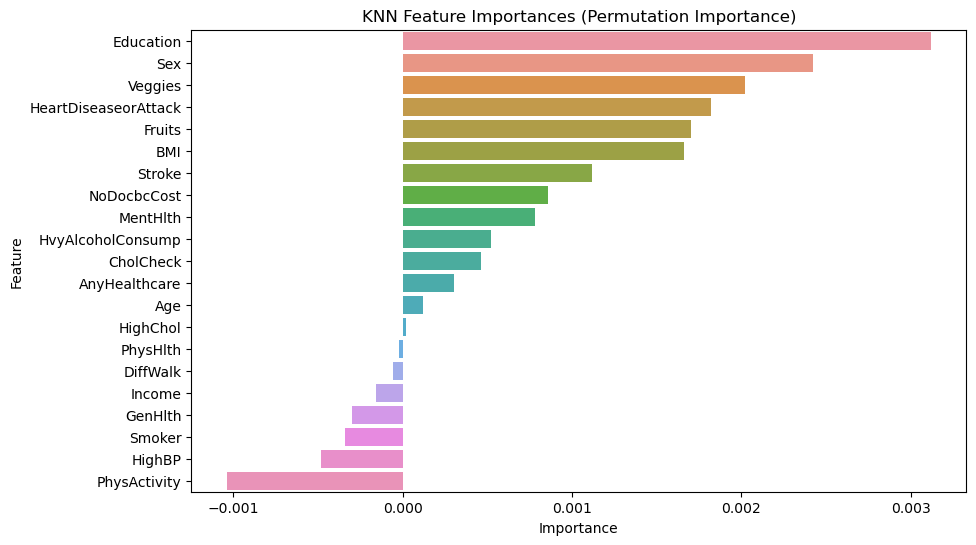

In [66]:
#Feature importance
#Compute Permutation Importance on Smaller Dataset
result = permutation_importance(knn_grid.best_estimator_, X_sample_pi, y_sample_pi, n_repeats=5, random_state=42, n_jobs=-1)

# Create a DataFrame to display the feature importances along with their feature names
knn_importances_df = pd.DataFrame({
    'Feature': cols,
    'Importance': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_importances_df)
plt.title('KNN Feature Importances (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

- BMI is the most important followed by General health , high cholestral, high BP , Age etc.
- Education and fruit eating habbit has no impact.

**SVM**
- Perform SVM with different kernels

In [67]:
%%time

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.7, stratify=y_train, random_state=42)


kernels = ['linear', 'poly', 'rbf','sigmoid']
cv_scores = []
for k in kernels:
    svc = SVC(kernel=k,cache_size=2000,max_iter=1000)
    scores = cross_val_score(svc, X_sample, y_sample, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_kernel = kernels[cv_scores.index(max(cv_scores))]
print("Optimal kernel :", optimal_kernel)
print("Cross-validation score :", max(cv_scores))
#about 4m

Optimal kernel : rbf
Cross-validation score : 0.6829435782802527
CPU times: user 4min 8s, sys: 8.95 s, total: 4min 17s
Wall time: 5min 2s


In [68]:
%%time

kernels = ['linear', 'poly', 'rbf','sigmoid']
cv_scores = []
for k in kernels:
    svc = SVC(kernel=k,cache_size=2000,max_iter=1000)
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_kernel = kernels[cv_scores.index(max(cv_scores))]
print("Optimal kernel :", optimal_kernel)
print("Cross-validation score :", max(cv_scores))

Optimal kernel : rbf
Cross-validation score : 0.7141359390697672
CPU times: user 5min 17s, sys: 10.2 s, total: 5min 27s
Wall time: 5min 57s


In [69]:
%%time

svm = SVC(class_weight='balanced',probability=True)
svm_params = {
    'kernel': [optimal_kernel],
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1]
}

CPU times: user 21 µs, sys: 87 µs, total: 108 µs
Wall time: 297 µs


In [70]:
svm_grid = GridSearchCV(svm, param_grid=svm_params, cv=5, scoring='accuracy')
svm_grid


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1],
                         'kernel': ['rbf']},
             scoring='accuracy')

- Most optiomal is rbf with CVS of 0.7141

**Decision Trees**

In [71]:
dtree = DecisionTreeClassifier()

dtree_params = {
    'max_depth': [None, 1, 11, 2],
    'min_samples_split': [2, 21, 1],
    'min_samples_leaf': [2, 21, 2],
    'criterion': ['gini', 'entropy']
}

dtree_grid = GridSearchCV(dtree, param_grid=dtree_params, cv=5, scoring='accuracy')

start_time = time.time()
dtree_grid.fit(X_train, y_train)
end_time = time.time()

In [72]:
fit_time = str(round(end_time-start_time,2))+'s'
fit_time

'59.67s'

In [73]:
dtree_execution_time = end_time - start_time
dtree_grid_best_params = dtree_grid.best_params_
dtree_grid_train_score = dtree_grid.score(X_train, y_train)
dtree_grid_test_score = dtree_grid.score(X_test, y_test)
print('dtree_grid_best_params: ', dtree_grid_best_params)
print('dtree_grid_train_score: ', round(dtree_grid_train_score,2))
print('dtree_grid_test_score: ', round(dtree_grid_test_score,2))
print('dtree_execution_time: ', round(dtree_execution_time,2), 's')

dtree_grid_best_params:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 21}
dtree_grid_train_score:  0.84
dtree_grid_test_score:  0.83
dtree_execution_time:  59.67 s


In [74]:
y_pred_dtree = dtree_grid.best_estimator_.predict(X_test)
dtree_precision_score = precision_score(y_test, y_pred_dtree,average='micro')
dtree_recall_score = recall_score(y_test, y_pred_dtree,average='micro')
dtree_f1_score = f1_score(y_test, y_pred_dtree,average='micro')
y_prob_dtree = dtree_grid.best_estimator_.predict_proba(X_test)#[:, 1]
auc_dtree = roc_auc_score(y_test, y_prob_dtree,multi_class='ovr',average='micro')
print('dtree_precision_score: ', round(dtree_precision_score,2))
print('dtree_recall_score: ', round(dtree_recall_score,2))
print('dtree_f1_score: ', round(dtree_f1_score,2))
print(classification_report(y_test, y_pred_dtree))
print("AUC = ",round(auc_dtree,2))


dtree_precision_score:  0.83
dtree_recall_score:  0.83
dtree_f1_score:  0.83
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     57017
           1       0.00      0.00      0.00      1389
           2       0.56      0.15      0.23     10529

    accuracy                           0.83     68935
   macro avg       0.47      0.38      0.38     68935
weighted avg       0.78      0.83      0.79     68935

AUC =  0.95


In [75]:
###


dtree_precision = precision_score(y_test, y_pred_dtree, average=None, zero_division=0.0)
dtree_recall = recall_score(y_test, y_pred_dtree, average=None)
dtree_f1 = f1_score(y_test, y_pred_dtree, average=None)

precision_rounded_dtree = [round(p, 2) for p in dtree_precision]
recall_rounded_dtree = [round(r, 2) for r in dtree_recall]
f1_rounded_dtree = [round(f, 2) for f in dtree_f1]

n_classes = 3
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 
fpr_dtree , tpr_dtree , thresholds_dtree, auc_score_dtree  = {}, {}, {}, {}
# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr_dtree[i], tpr_dtree[i], thresholds_dtree[i] = roc_curve(y_test_bin[:, i], y_prob_dtree[:, i])
    auc_score_dtree[i] = round(roc_auc_score(y_test_bin[:, i], y_prob_dtree[:, i]),2)

# Calculate ROC curve and AUC for micro-average
fpr_micro_dtree, tpr_micro_dtree, _ = roc_curve(y_test_bin.ravel(), y_prob_dtree.ravel())
roc_auc_micro_dtree = round(roc_auc_score(y_test_bin, y_prob_dtree, average='micro'),2)

# Calculate ROC curve and AUC for macro-average
# Macro-average does not have its own fpr and tpr; it's an aggregate of individual class curves
roc_auc_macro_dtree = round(roc_auc_score(y_test_bin, y_prob_dtree, average='macro'),2)  


###

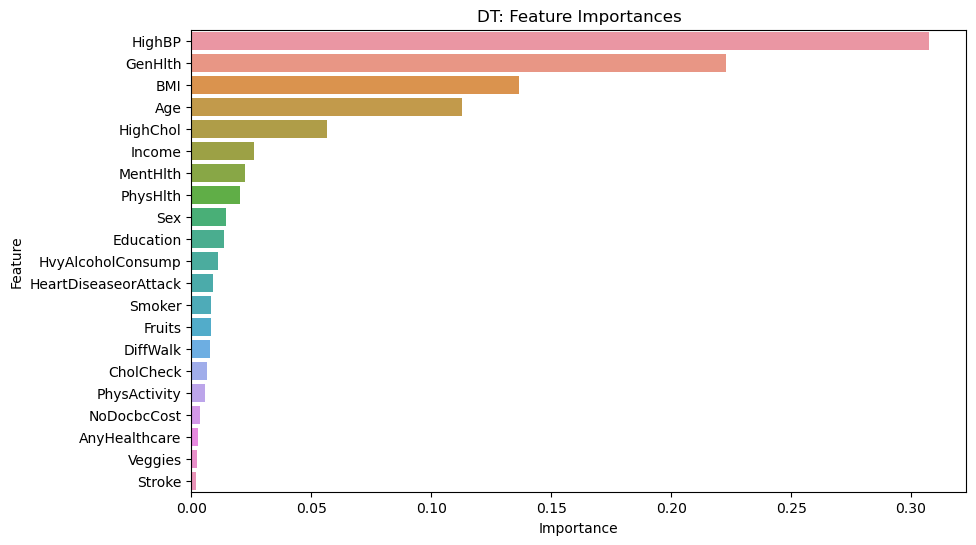

In [76]:
# Retrieve the feature importances
importances = dtree_grid.best_estimator_.feature_importances_

# Feature importances along with their feature names
importances_df_dtree = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df_dtree)
plt.title('DT: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [87]:
# Extract and display the decision rules
tree_rules = export_text(dtree_grid.best_estimator_, feature_names=X_train.columns.tolist(), max_depth=2)
print("Sample: ",tree_rules)

Sample:  |--- HighBP <= 0.09
|   |--- GenHlth <= -0.10
|   |   |--- Age <= -0.51
|   |   |   |--- truncated branch of depth 9
|   |   |--- Age >  -0.51
|   |   |   |--- truncated branch of depth 9
|   |--- GenHlth >  -0.10
|   |   |--- Age <= -1.16
|   |   |   |--- truncated branch of depth 9
|   |   |--- Age >  -1.16
|   |   |   |--- truncated branch of depth 9
|--- HighBP >  0.09
|   |--- GenHlth <= -0.10
|   |   |--- BMI <= 0.12
|   |   |   |--- truncated branch of depth 9
|   |   |--- BMI >  0.12
|   |   |   |--- truncated branch of depth 9
|   |--- GenHlth >  -0.10
|   |   |--- BMI <= 0.41
|   |   |   |--- truncated branch of depth 9
|   |   |--- BMI >  0.41
|   |   |   |--- truncated branch of depth 9



In [78]:
y_train.head(4)

176194    0
196364    0
241226    0
220647    2
Name: Diabetes_012, dtype: int64

In [79]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(dtree_grid.best_estimator_, out_file=None, feature_names=X_train.columns,  
                           class_names=['0','1','2'], filled=True, rounded=True, special_characters=True)

# Render the dot file as a graph
graph = graphviz.Source(dot_data)

# Render and save the graph to the specified path
graph.render("../images/decision_tree", format='pdf')

'../images/decision_tree.pdf'

**Summary**

In [80]:
results_df_improved = ''
res_dict = {
    'Model': ['Logistic Regression', 'Decision Trees', 'KNN'],
    'Train Time': [logreg_execution_time, dtree_execution_time, knn_execution_time],
    'Train Accuracy': [logreg_grid_train_score, dtree_grid_train_score, knn_grid_train_score],
    'Test Accuracy': [logreg_grid_test_score, dtree_grid_test_score, knn_grid_test_score],
    'Precision': [logreg_precision_score, dtree_precision_score, knn_precision_score],
    'Recall': [logreg_recall_score, dtree_recall_score, knn_recall_score],
    'F1': [logreg_f1_score, dtree_f1_score, knn_f1_score],
    'AUC': [auc_logreg, auc_dtree, auc_knn],
    'precision': [precision_rounded_logreg, precision_rounded_dtree, precision_rounded_knn],
    'recall': [recall_rounded_logreg, recall_rounded_dtree, recall_rounded_knn],
    'f1': [f1_rounded_logreg, f1_rounded_dtree, f1_rounded_knn],
    'AUC_Score': [ auc_score_logreg, auc_score_dtree, auc_score_knn],
    'fpr':[fpr_logreg, fpr_dtree, fpr_knn],
    'tpr':[tpr_logreg, tpr_dtree, tpr_knn],
    'thresholds':[thresholds_logreg, thresholds_dtree, thresholds_knn],
    'fpr_micro':[fpr_micro_logreg, fpr_micro_dtree, fpr_micro_knn],
    'tpr_micro':[tpr_micro_logreg, tpr_micro_dtree, tpr_micro_knn],
    'roc_auc_micro':[roc_auc_micro_logreg, roc_auc_micro_dtree, roc_auc_micro_knn],
    'roc_auc_macro':[roc_auc_macro_logreg, roc_auc_macro_dtree, roc_auc_macro_knn],
    'y_pred': [y_pred_logreg, y_pred_dtree, y_pred_knn],
    'y_prob': [y_prob_logreg, y_prob_dtree, y_prob_knn]
}
results_df_improved = pd.DataFrame(res_dict)

#### ROC-AUC

**Micro-averaging** - Micro-averaging aggregates the contributions from all the classes (using numpy.ravel) to compute the average metrics. In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging.

**Macro-average** (not recommended/not used) - Obtaining the Macro-average requires computing the metric independently for each class and then taking the average over them, hence treating all classes equally a priority. We first aggregate the true/false positive rates per class.

In [81]:
results_df_improved


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC,precision,recall,...,AUC_Score,fpr,tpr,thresholds,fpr_micro,tpr_micro,roc_auc_micro,roc_auc_macro,y_pred,y_prob
0,Logistic Regression,173.283977,0.831516,0.832596,0.832596,0.832596,0.832596,0.947630,"[0.84, 0.0, 0.56]","[0.98, 0.0, 0.13]",...,"{0: 0.8, 1: 0.67, 2: 0.81}","{0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{0: [0.0, 1.753862882999807e-05, 0.00012277040...","{0: [inf, 0.9695338994377377, 0.96806248835854...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.4506419090447522e-05, 0.00010154493363...",0.95,0.76,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.8313798580710199, 0.026126301276753982, 0...."
1,Decision Trees,59.671907,0.836384,0.833568,0.833568,0.833568,0.833568,0.945009,"[0.85, 0.0, 0.56]","[0.98, 0.0, 0.15]",...,"{0: 0.79, 1: 0.62, 2: 0.8}","{0: [0.0, 0.017284779325390166, 0.017452592716...","{0: [0.0, 0.11470263254818738, 0.1187540558079...","{0: [inf, 1.0, 0.9982142857142857, 0.997716894...","[0.0, 0.001494161166316095, 0.0015086675854065...","[0.0, 0.0948719808515268, 0.09822296366142018,...",0.95,0.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.9084033613445378, 0.009243697478991597, 0...."
2,KNN,133.984221,0.831852,0.830347,0.829651,0.829651,0.829651,0.941378,"[0.84, 0.0, 0.52]","[0.98, 0.0, 0.13]",...,"{0: 0.78, 1: 0.56, 2: 0.78}","{0: [0.0, 0.030709850646081557, 0.086843430105...","{0: [0.0, 0.25530981987828194, 0.4322745847729...","{0: [inf, 1.0, 0.9523809523809523, 0.904761904...","[0.0, 0.0026546746935518966, 0.007507071879306...","[0.0, 0.2111699426996446, 0.35755421774135054,...",0.94,0.71,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.9047619047619048, 0.0, 0.09523809523809523..."


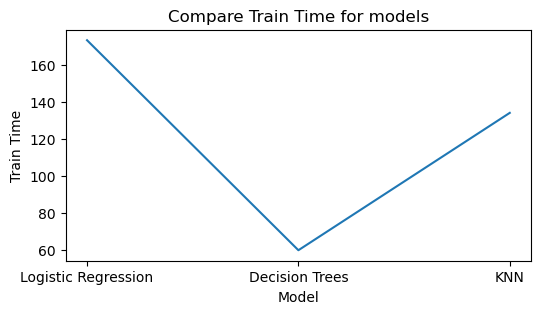

In [82]:
# Compare Train Time for models

plt.figure(figsize=(6,3))
sns.lineplot(results_df_improved, x='Model', y='Train Time')
plt.title('Compare Train Time for models')
plt.show()

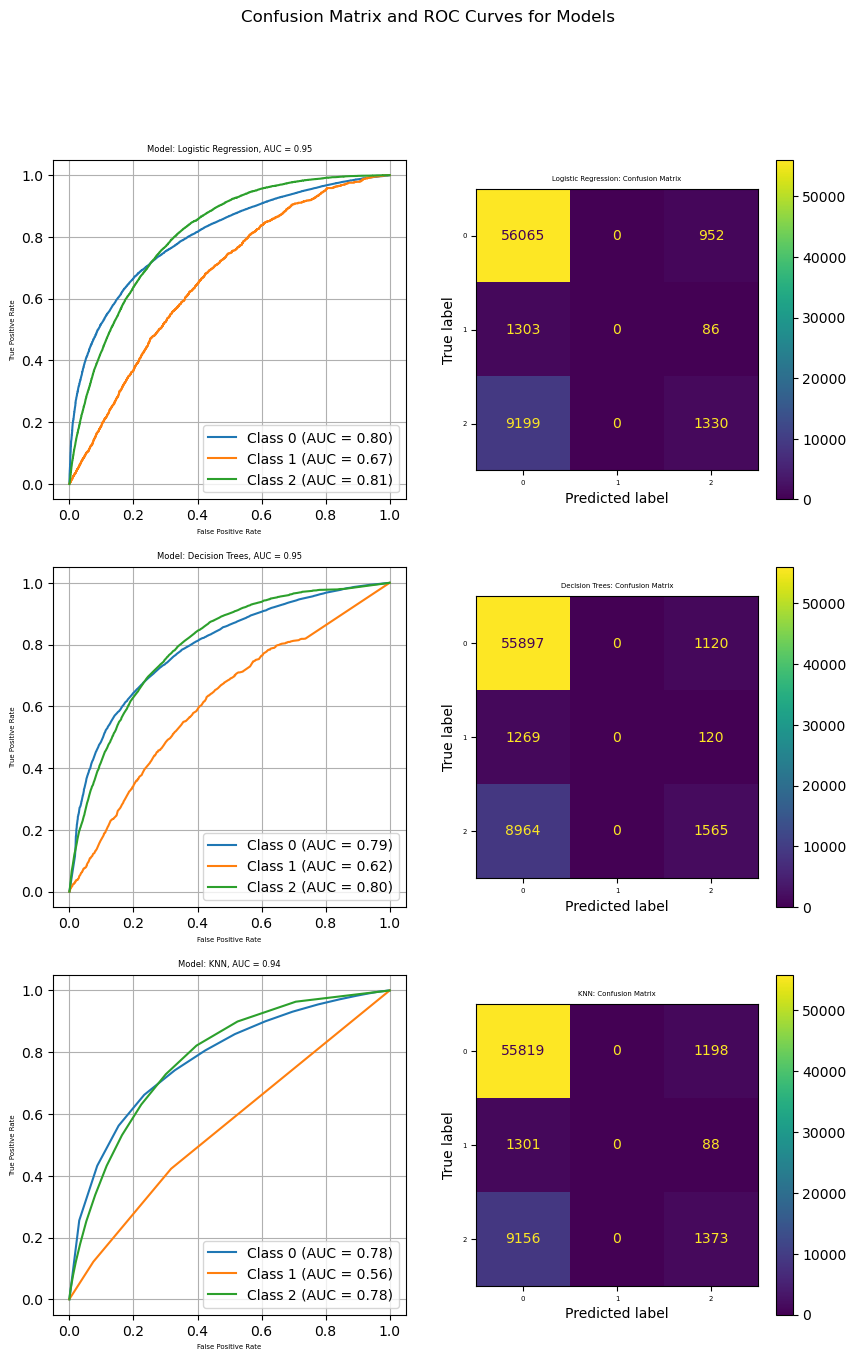

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [83]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10,15))
# Add a title for the entire figure
fig.suptitle('Confusion Matrix and ROC Curves for Models')  

plt_count = 0

fpr = {}
tpr = {}
roc_auc = {}
for index, row in results_df_improved.iterrows():
    plt.figure(figsize=(10,15))

    model = row['Model']
    y_prob = row['y_prob']

    fpr=row['fpr']
    tpr=row['tpr']
    roc_auc=row['AUC_Score']
    ax = axes.flat[plt_count]
    
    # Visualizing ROC Curve

    # Convert `y_true` into One-vs-Rest Format
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Converts to 3 binary columns

    plt.figure(figsize=(8, 6))

    for i in range(3):  # 3 classes

        ax.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        ax.set_xlabel('False Positive Rate',fontsize=5)
        ax.set_ylabel('True Positive Rate',fontsize=5)
        ax.set_title(f"Model: {model}, AUC = {round(row['AUC'],2)}",fontsize=6)  
        ax.legend()
        ax.grid()  
    
    
    plt_count += 1

    y_pred = row['y_pred']
    ax = axes.flat[plt_count] 
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
    ax.set_title(f"{model}: Confusion Matrix",fontsize=5)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
    plt_count += 1

plt.tight_layout()

plt.show()

In [84]:
res_dict.keys()

dict_keys(['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'precision', 'recall', 'f1', 'AUC_Score', 'fpr', 'tpr', 'thresholds', 'fpr_micro', 'tpr_micro', 'roc_auc_micro', 'roc_auc_macro', 'y_pred', 'y_prob'])

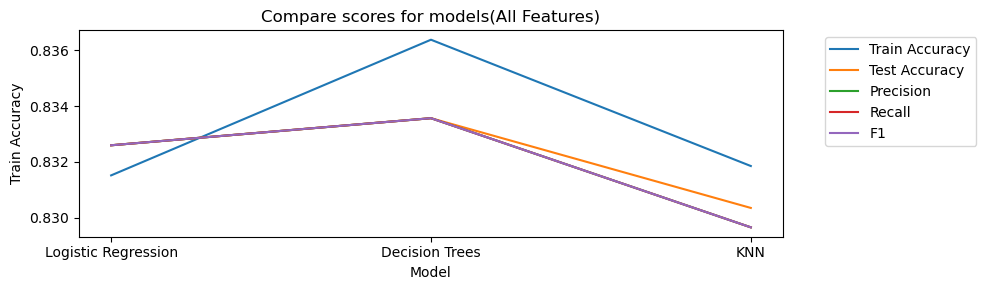

In [85]:
# Define the metrics to plot
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']
plt.figure(figsize=(10,3))
# Plot each metric
for metric in metrics:
    sns.lineplot(data=results_df_improved, x='Model', y=metric, label=metric)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Compare scores for models(All Features)')
plt.tight_layout()
plt.show()


### Summary

**Logistic Regression:**
The logistic regression offeres a best AUC score of 94.8%. Accuracy is much lower when compred to decision tree. Training time was more than double of DT. 

**KNN:**
The KNN algorithm took longet to train. The accuracy was 84% and AUC also around 94.1% which is lowest comare to DT and LR. C

**SVM:**
The SVM had to be performed on a subset of 10,000 datapoint and required extremely long fit time. For a subset of 10% of the data the gridsearch and fit time long time. For the impracticality of such model in real time and lack of meaningful result, model is not optimal.

**Decision Tree:**
The decision tree offered a very similar AUC compared to the logistic regression close to 94.4%. Accuracy is also very close to LR and similar F1 score. Overall it took the least time with highest AUC score.

**Choice of the Model:**
- Logistic Regression with AUC of 94.8% and best F1 at 0.83.
- Training time is managable more the Dtree but better when compared to KNN or SVM.

**Future:**
These models an be further exlplored with differnet feature selections.

- Exploring further parameters for the top two models (logistic regression and decision trees). Particularly logistic regression because of manageble time to train with highest score.